# Signal processing for bio-image analysts.

## Calculation of the Signal-to-noise ratio (SNR)

Imagine we have the ideal noise free image $I$ and a noisy approximation of the image $\overset{-}{I}$. In this case we can calculate the exact SNR and CV since we do exactly know what the signal and what the noise is. To calculate the power of the signal we sum up the squared intensity values of the noise free image and divide by the number of samples N. To calculate the power of the noise we calculate sum of the squared differences of the samples from the noise free and the noisy image and divide by the number of samples. This is called the *mean squared error (MSE)*. Note that the square-root of the MSE is called the *root mean squarred error (RMSE)*. Since we build the ratio of the power of the signal to the power of the noise, the number of samples is eliminated. To get the dB value we apply the $10 \cdot \log_{10}$ rule. 

$$ {\mathit{MSE}} = \dfrac{1}{N} \cdot \sum\limits_{i=0}^{N - 1} (I_i - \overset{-}{I_i})^2 \quad \text{(6.1)} $$

$$ {\mathit{SNR}} = \dfrac {\sum\limits_{i=0}^{N - 1} I^2_i }{RMSE^2} = \dfrac {\sum\limits_{i=0}^{N - 1} I^2_i }{MSE} = \dfrac {\sum\limits_{i=0}^{N - 1} I^2_i }{\sum\limits_{i=0}^{N - 1} (I_i - \overset{-}{I_i})^2} \quad \text{(6.2)} $$

$$ {\mathit{SNR_{dB}}} = 10 \cdot \log_{10}{\dfrac {\sum\limits_{i=0}^{N - 1} I^2_i }{\sum\limits_{i=0}^{N - 1} (I_i - \overset{-}{I_i})^2} \text{dB} \quad \text{(6.3)}} $$

Usually we do not have the noise free image. However when we want to evaluate the effect of noise removal methods or noiseful compression algorithms, we can use a synthetic noise free image or an image with a very low noise level and then artificially add noise to it to create a noisy version. Then we apply the algorithm to the noisy image and compare the SNR of the result with the SNR of the unchanged noisy image.

We will calculate the SNR now. We download a sample image and create different noisy versions of it. To create the noisy images we will add gaussian noise with a given standard deviation to the original image. 

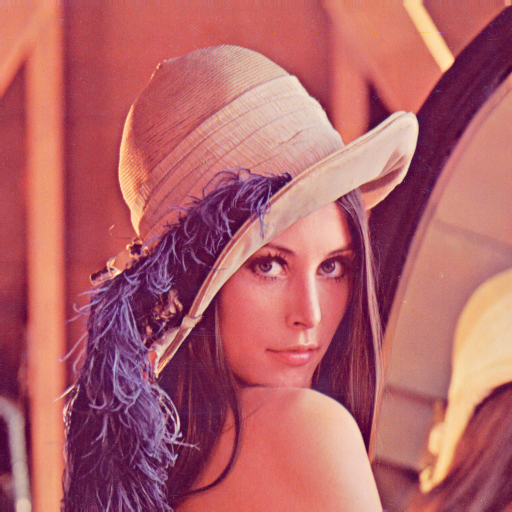

In [2]:
signal = ij2.io().open("https://imagej.nih.gov/ij/images/lena-std.tif")

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.convert.AbstractConvertService.convert(AbstractConvertService.java:133)
	at org.scijava.convert.AbstractConvertService.convert(AbstractConvertService.java:120)
	at net.image

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.util.ConversionUtils.handler(ConversionUtils.java:222)
	at org.scijava.util.ConversionUtils.convert(ConversionUtils.java:81)
	at org.scijava.util.ClassUtils.setValue(ClassUt

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

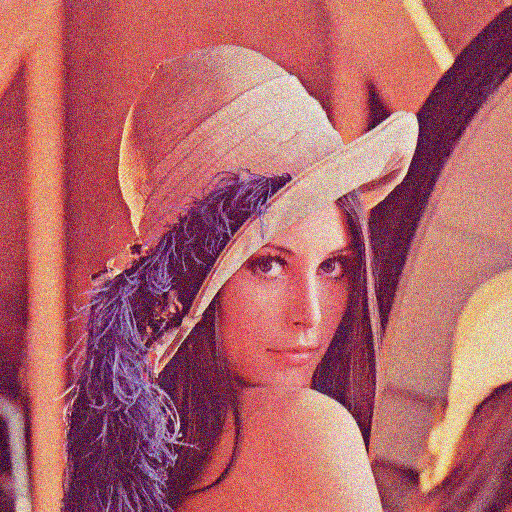

In [3]:
noisyLena = ij2.op().copy().img(ij2.op().create().img(signal), signal) 
noiseOp = ij2.op().op("addNoise", noisyLena.firstElement(), 0, 255, 25)
ij2.op().map(noisyLena, noiseOp)

In [7]:
import net.imglib2.IterableInterval

// Number of Samples
samples = signal.size();

// sum of the squares of the signal
sumOfSquaresSignal = ij2.op().stats().max(ij2.op().image().squareIntegral(signal))

// mean of the signal
sumOfSignal = ij2.op().stats().max(ij2.op().image().integral(signal))
mean = sumOfSignal.getRealDouble() / samples

// sum of the squares of the noise 
floatRef = ij2.op().convert().float32(signal)
floatNoise = ij2.op().convert().float32(noisyLena)
diff = ij2.op().math().subtract((IterableInterval)floatRef, (IterableInterval)floatNoise)
sqNoise = ij2.op().image().squareIntegral(diff)
sumOfSquaresNoise = ij2.op().stats().max(sqNoise)

intDen = sumOfSignal.getRealDouble();
meanPower = sumOfSquaresSignal.getRealDouble()/samples
MSE = sumOfSquaresNoise.getRealDouble() / samples
RMSE = Math.sqrt(MSE)
SNR_p = sumOfSquaresSignal.getRealDouble() / sumOfSquaresNoise.getRealDouble() 
SNR_a = mean / RMSE
SNRdB = 10 * Math.log10(SNR_p)
SNRdB_a = 20 * Math.log10(SNR_a)
CV = (RMSE / mean) * 100;

println("number of samples: " + samples)
println("integrated density: " + intDen)
println("mean of signal: " + mean)
println("Root mean square error (RMSE): " + RMSE)
println("mean power of signal: " + meanPower)
println("Mean square error (MSE): " + MSE)
println("SNR_p: " + SNR_p)
println("SNR_a: " + SNR_a)
println("SNR_p: " + SNRdB + "dB" + " (SNR_a: "+SNRdB_a+"dB)" )
println("CV: " + CV + "%")

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.convert.AbstractConvertService.convert(AbstractConvertService.java:133)
	at org.scijava.convert.AbstractConvertService.convert(AbstractConvertService.java:120)
	at net.image

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.convert.AbstractConvertService.convert(AbstractConvertService.java:133)
	at org.scijava.convert.AbstractConvertService.convert(AbstractConvertService.java:120)
	at net.image

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.convert.AbstractConvertService.convert(AbstractConvertService.java:133)
	at org.scijava.convert.AbstractConvertService.convert(AbstractConvertService.java:120)
	at net.image

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

[ERROR] Malfunctioning plugin: net.imagej.notebook.converter.TableToHTMLNotebookConverter
java.lang.NoClassDefFoundError: net/imagej/table/Table
	at net.imagej.notebook.converter.TableToHTMLNotebookConverter.getInputType(TableToHTMLNotebookConverter.java:40)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:113)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:158)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:97)
	at org.scijava.convert.AbstractConverter.canConvert(AbstractConverter.java:89)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:144)
	at org.scijava.convert.AbstractConverter.supports(AbstractConverter.java:69)
	at org.scijava.plugin.HandlerService.getHandler(HandlerService.java:61)
	at org.scijava.plugin.HandlerService.supports(HandlerService.java:84)
	at org.scijava.convert.AbstractConvertService.supports(AbstractConvertService.java:97)
	at net.imagej.ops.DefaultOpMa

number of samples: 786432
integrated density: 1.00842898E8
mean of signal: 128.22837575276694
Root mean square error (RMSE): 24.20946678182631
mean power of signal: 19921.596115112305
Mean square error (MSE): 586.0982818603516
SNR_p: 33.99019709097011
SNR_a: 5.296621231204732
SNR_p: 15.313536828317385dB (SNR_a: 14.479978340798894dB)
CV: 18.879960570118907%


null

In [1]:
%classpath add jar ../Fiji.app/jars/*
%classpath add jar ../Fiji.app/jars/bio-formats/*
currentPath = System.getProperty("java.library.path")
newPath = currentPath + ":../Fiji.app/lib/linux64"
System.setProperty( "java.library.path", newPath )
import net.imagej.ImageJ
ij2 = new ImageJ()

net.imagej.ImageJ@1302d92d